In [2]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from fbprophet.plot import add_changepoints_to_plot

In [3]:
import requests

POLONIEX_OHLCV_BASEURL = 'https://poloniex.com/public?command=returnChartData&currencyPair='

"""
https://poloniex.com/public?command=returnChartData&currencyPair=BTC_POT&start=1435699200&end=9999999999&period=14400

"""

def get_ohlcv_poloniex(pair='BTC_ETH', start=1435699200, end=9999999999, period=900):
    """
    returns ohlcv data for poloniex as pandas dataframe
    convert to unix timestamp using https://coderstoolbox.net/unixtimestamp/
    :param pair: str pair on poloniex
    :param start: int unix timestamp of beginning time
    :param end: int unix timestamp of ending time
    :param period: int candle width in seconds
    :return: pandas df of ohlcv data from poloniex for specified pair, times, and period
    """
    query = POLONIEX_OHLCV_BASEURL + pair + '&start=' + str(start) + '&end=' + str(end) + '&period=' + str(period)
    resp = requests.get(query,verify=False)

    if resp.status_code != 200:
        raise requests.ApiError('GET /tasks/ {}'.format(resp.status_code))

    return pd.DataFrame(resp.json())

In [4]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
#no option to pass in 3600 sec candles
df = df[df.index % 4 == 0]
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['volume']
df['logVolume'] = df['volume'].apply(np.log)

/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
df

,close,date,high,low,open,quoteVolume,volume,weightedAverage,ds,y,logVolume
0,1143.999999,1483601400,1145.000000,1135.000000,1137.020000,9.170638,10475.203351,1142.254643,2017-01-05 07:30:00,10475.203351,9.256766
4,1136.000000,1483605000,1136.000000,1124.018000,1124.500000,23.515077,26504.327610,1127.120601,2017-01-05 08:30:00,26504.327610,10.185063
8,1092.000000,1483608600,1099.232465,1055.291200,1085.000000,229.543299,247051.025497,1076.271998,2017-01-05 09:30:00,247051.025497,12.417350
12,1086.000000,1483612200,1111.000000,1085.000000,1096.000000,72.148022,79375.560627,1100.176535,2017-01-05 10:30:00,79375.560627,11.281946
16,1099.593509,1483615800,1100.000000,1087.000000,1087.000000,20.601704,22609.130935,1097.439857,2017-01-05 11:30:00,22609.130935,10.026109
20,1025.000000,1483619400,1073.460000,1022.300000,1070.238834,200.071762,209762.651118,1048.437066,2017-01-05 12:30:00,209762.651118,12.253732
24,940.000000,1483623000,990.000000,935.000000,973.000000,407.821379,394690.680904,967.802820,2017-01-05 13:30:00,394690.680904,12.885858
28,952.890000,1483626600,968.000000,949.990000,953.000000,146.216273,139756.723942,955.821958,2017-01-05 14:30:00,139756.723942,11.847659
32,993.337000,1483630200,993.337000,972.010001,983.337000,145.688098,143317.887496,983.730927,2017-01-05 15:30:00,143317.887496,11.872820
36,953.360966,1483633800,973.060000,940.338000,973.060000,256.232347,244652.735669,954.808159,2017-01-05 16:30:00,244652.735669,12.407595


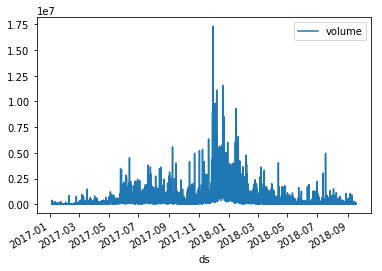

In [6]:
df.plot(x='ds', y ='volume')


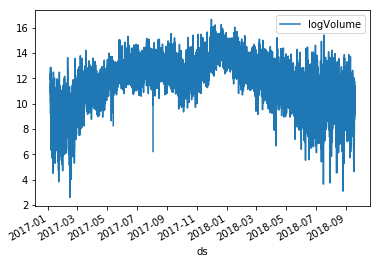

In [7]:
df.plot(x='ds', y ='logVolume')

# Start of Prophet Work

In [8]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [9]:
df.y.kurtosis()
#The kurtosis is less than 3, which means there are very few outliers than there are in a normal distribution

78.88635933169486

In [10]:
df.y.skew()
#The skew is positive, which means that that the the graph is asymmetric, 
#with a longer right tail and the mass on the left side.

6.349993117713594

# Creating Future and Forecast with 30 periods, then the volume is plotted with prophet

In [11]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=30)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
14927,2018-10-14 04:30:00,-55490.005946,-743223.175877,596652.009715
14928,2018-10-15 04:30:00,-38387.998635,-711209.401583,644250.035438
14929,2018-10-16 04:30:00,2067.723073,-656909.908006,708873.599892
14930,2018-10-17 04:30:00,20989.254513,-645106.159014,709571.135002
14931,2018-10-18 04:30:00,22343.325755,-669178.236136,714037.825796


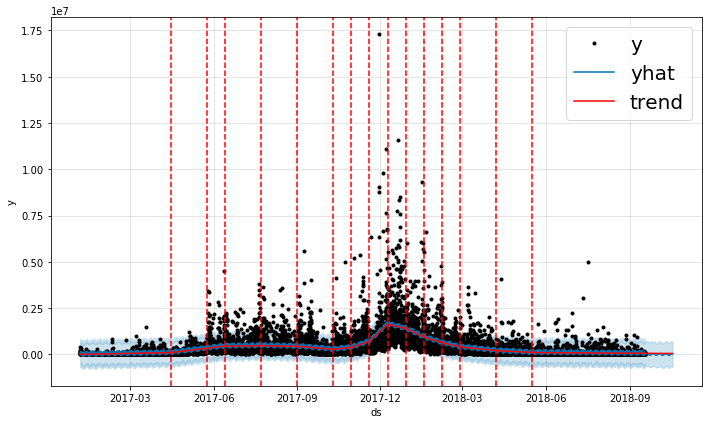

In [12]:
#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


# Daily Forecasts by plotting prophet components future uncertainty

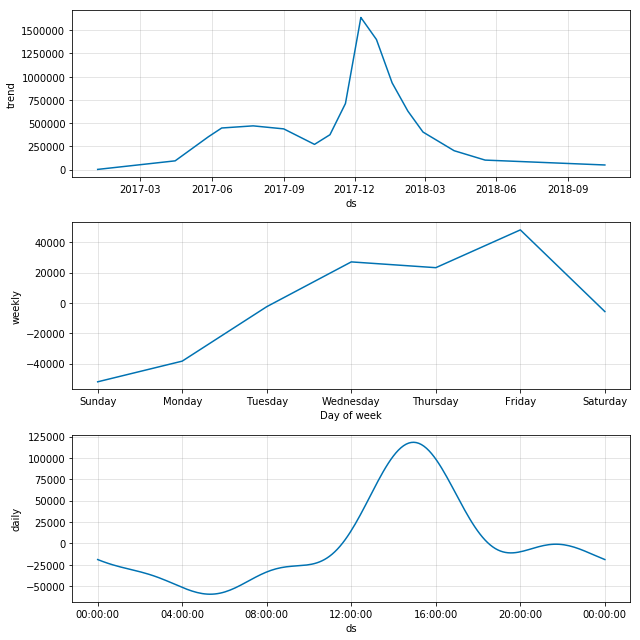

In [13]:
fig2 = prophet.plot_components(forecast,uncertainty=False)

# Build the prophet graph of volume data with a changepoint scale of .5; this makes the plotting more flexible

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


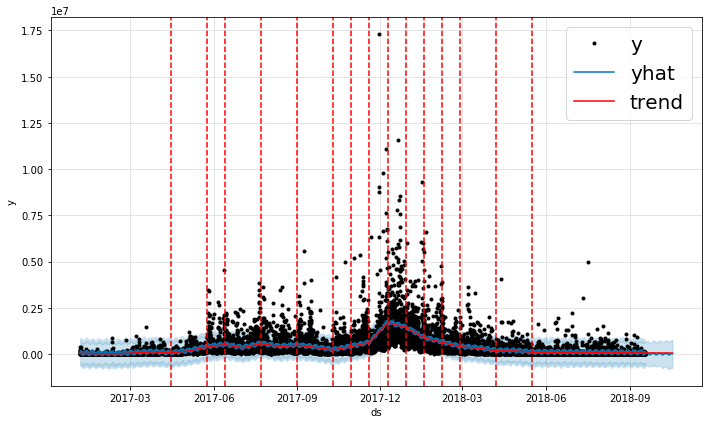

In [14]:
#Making the plotting more flexible (Alters the graph quite a bit, actually trends upwards instead of down)
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(df).predict(future)
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


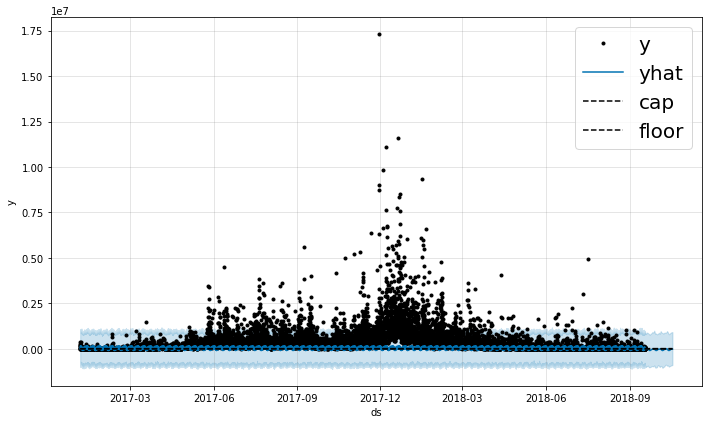

In [15]:
df['cap'] = 2500
df['floor'] = 20000
bc_Volume_Logistic = Prophet(growth = 'logistic')
bc_Volume_Logistic.fit(df)
future_logistic = bc_Volume_Logistic.make_future_dataframe(periods=30)
future_logistic['cap'] = 2500
future_logistic['floor'] = 20000
fcst_logistic = bc_Volume_Logistic.predict(future_logistic)
fig_logistic = bc_Volume_Logistic.plot(fcst_logistic)
plt.legend(loc='best', fontsize=20)

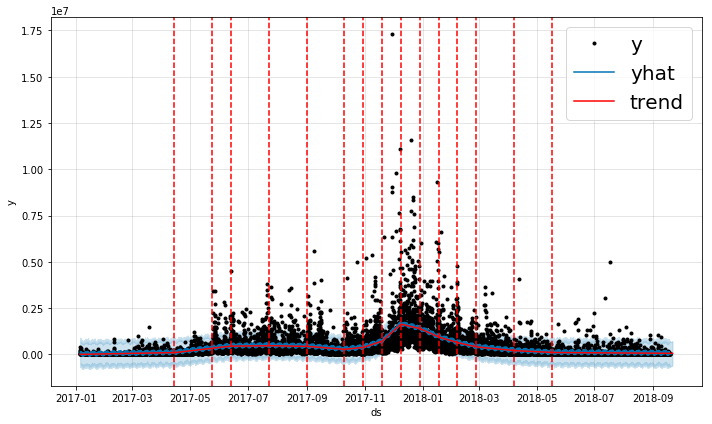

In [16]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=3)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

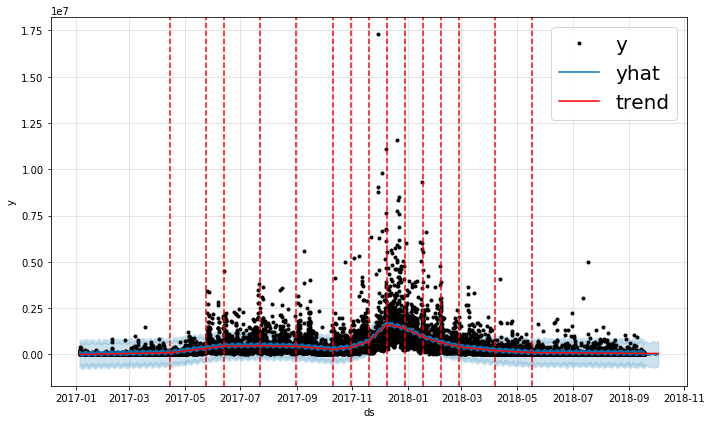

In [17]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=15)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

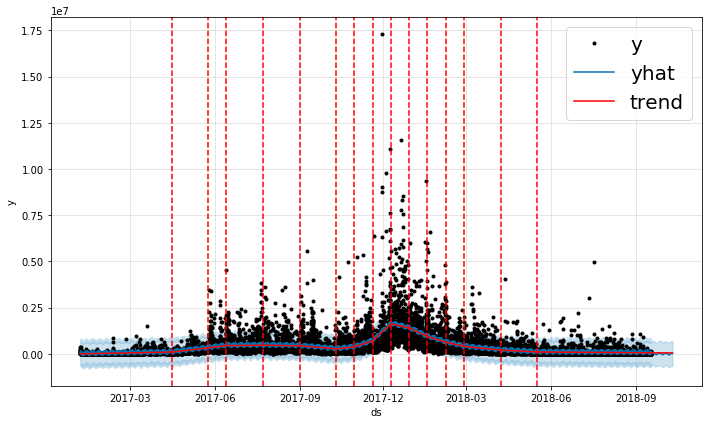

In [18]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=23)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)

# Deeper Weekly Analysis (Novermber 2017 - March 2018)

In [19]:
df2 = df.loc[30000:40000]

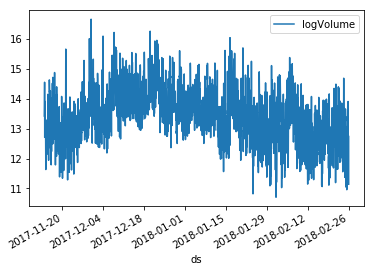

In [20]:
df2.plot(x='ds', y ='logVolume')

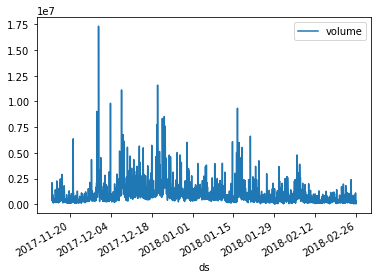

In [21]:
df2.plot(x='ds', y ='volume')

In [22]:
prophet = Prophet()
prophet.fit(df2)

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [23]:
#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=30)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2526,2018-03-23 23:30:00,-32265.977030,-1.439046e+06,1.289290e+06
2527,2018-03-24 23:30:00,-175984.897036,-1.496256e+06,1.219683e+06
2528,2018-03-25 23:30:00,-117429.499605,-1.606444e+06,1.249575e+06
2529,2018-03-26 23:30:00,-160528.050902,-1.547734e+06,1.229421e+06
2530,2018-03-27 23:30:00,145619.518950,-1.206298e+06,1.548495e+06


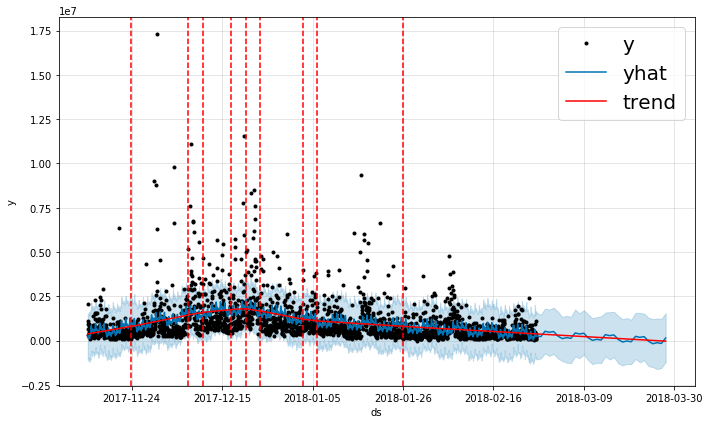

In [24]:
#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


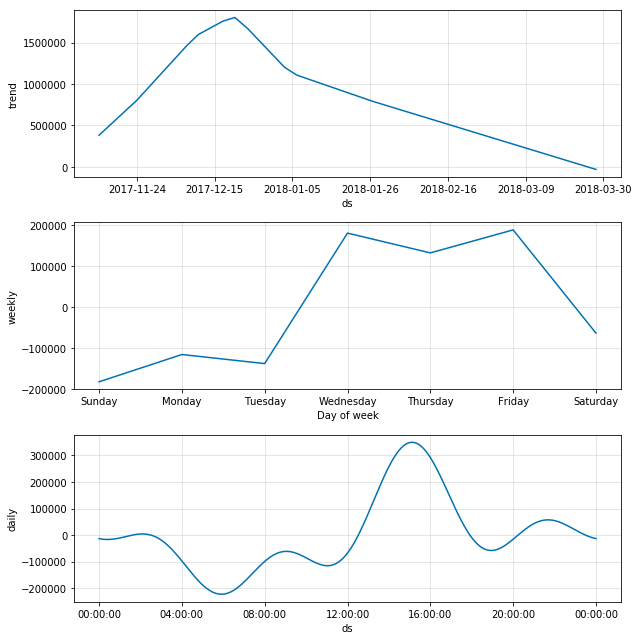

In [25]:
fig2 = prophet.plot_components(forecast,uncertainty=False)

# Deeper Weekly Analysis (June - October)

In [26]:
df = get_ohlcv_poloniex(pair='USDT_BTC', start=1483600958, end=9999999999, period=900)
#no option to pass in 3600 sec candles
df = df[df.index % 4 == 0]
df['ds'] = pd.to_datetime(df['date'], unit='s')
df['y'] = df['volume']
df['logVolume'] = df['volume'].apply(np.log)
df3 = df.loc[50000:60000]

/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


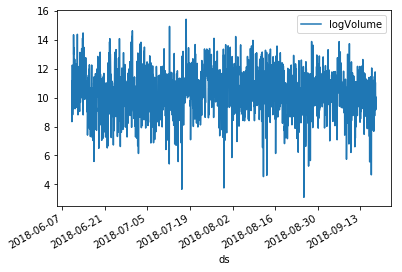

In [27]:
df3.plot(x='ds', y ='logVolume')

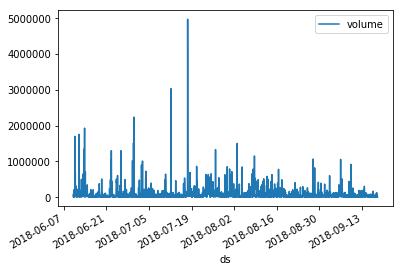

In [28]:
df3.plot(x='ds', y ='volume')

In [29]:
prophet = Prophet()
prophet.fit(df3)

#Build future, periods set to 30 because there are 30 days of data
future = prophet.make_future_dataframe(periods=30)
#Build Forecast
forecast = prophet.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2427,2018-10-14 04:30:00,-52429.986080,-296763.170184,199254.309775
2428,2018-10-15 04:30:00,-36757.630133,-271264.151274,207016.676002
2429,2018-10-16 04:30:00,-11970.787051,-262070.264495,243225.494571
2430,2018-10-17 04:30:00,2312.475515,-239843.384344,239509.948573
2431,2018-10-18 04:30:00,-23664.240901,-294375.762103,215711.986592


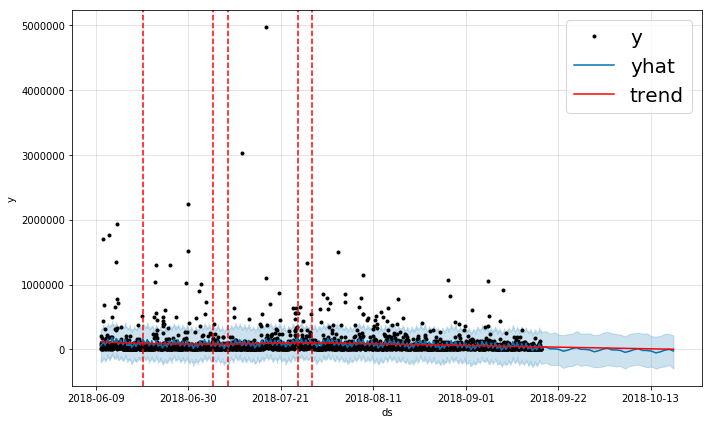

In [30]:
#Build the plot to show the forecasted data
bc_Volume = prophet.plot(forecast)
a = add_changepoints_to_plot(bc_Volume.gca(), prophet, forecast)
plt.legend(loc='best', fontsize=20)


In [31]:
#Here we can see that the volume in the future may either increase greatly or decrease lately, 
#though the trend is a bit downlward.

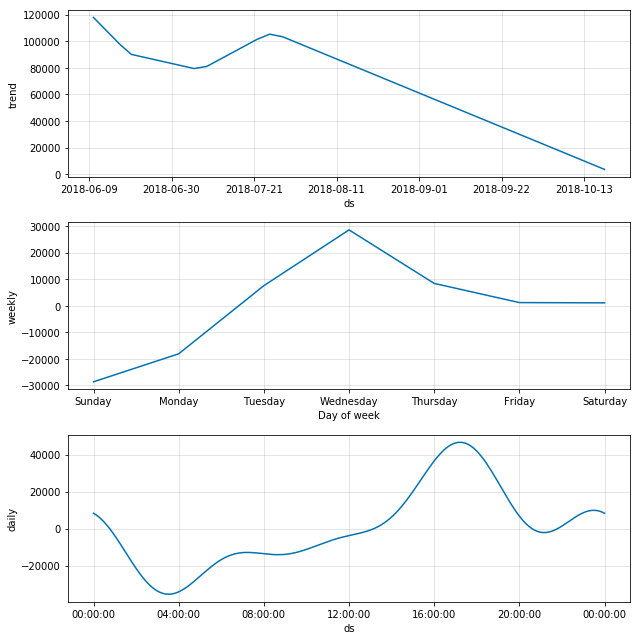

In [32]:
fig2 = prophet.plot_components(forecast,uncertainty=False)